In [1]:
# Time series demo 1
# using stock market data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# statsmodels library has support for time series analysis
import statsmodels.api as sm

In [3]:
# Data used here is stock market data for apple
df = pd.read_csv('./data/aap_data.csv')
display(df.head())

date   open   high      low  close   volume Name
0  2013-02-08  78.34  79.72  78.0100  78.90  1298137  AAP
1  2013-02-11  78.65  78.91  77.2300  78.39   758016  AAP
2  2013-02-12  78.39  78.63  77.5132  78.60   876859  AAP
3  2013-02-13  78.90  79.13  77.8500  78.97  1038574  AAP
4  2013-02-14  78.66  79.72  78.5850  78.84  1005376  AAP

In [4]:
# to convert this data into a pandas time series data frame we need convert data to timesampe and make it index
# create a datetime column
df['datetime']= pd.to_datetime(df['date'])
# set datetime as index
df.set_index('datetime',inplace=True)
print(df.index.dtype)

datetime64[ns]


In [5]:
#drop all columns except open
df.drop(columns=['date', 'high', 'low', 'close', 'volume', 'Name'],inplace=True)
# set frequenecy of the data frame
df = df.asfreq('M', method='ffill')
display(df.head(10))

open
datetime          
2013-02-28   77.35
2013-03-31   81.34
2013-04-30   83.00
2013-05-31   81.78
2013-06-30   80.01
2013-07-31   82.25
2013-08-31   80.76
2013-09-30   81.34
2013-10-31  100.00
2013-11-30  101.88

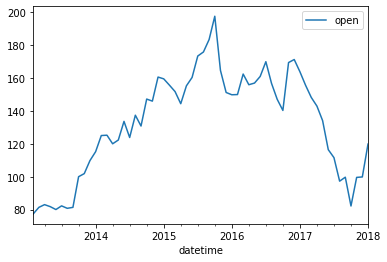

In [6]:
# we can plot the data simpley using plot
df.plot()

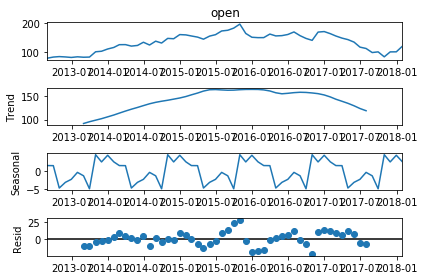

In [7]:
# we can use stats models Time Series Analysis library to decompose different components
decomposition = sm.tsa.seasonal_decompose(df['open'], model='additive')
fig = decomposition.plot()
plt.show()